<h1>Rectangular and circular Waveguides: modes, mn and Fco Calculator</h1>

<p style="text-align: justify; text-indent:4em"> 
In communication engineering and electromagnetism, <b>waveguides</b> are structures that direct / conveys electromagnetic waves. They are, in short, a hollow metal filled with a dielectric, commonly the air. In general, they have a rectangular or circular shape.
</p>

<img src="basic_waveguides.jpg">

<h3>Rectangular Waveguide</h3>
<p style="text-align: justify; text-indent:4em">  The lower cutoff frequency (or wavelength) for a particular mode in rectangular waveguide is determined by the following equations: 
</p>

\begin{align*} 
(f_c)_{mn} = \frac{1} {2 \pi \sqrt{\epsilon  \mu}\ }\ \sqrt{ \left ( \frac{m . \pi}{a} \right )^2 + \left ( \frac{n . \pi}{b} \right )^2  }\ \left [ Hz \right ]	
\end{align*}

\begin{align*} 
(\lambda_c)_{mn} = \frac{2} { \sqrt{ \left ( \frac{m}{a} \right )^2 + \left ( \frac{n}{b} \right )^2 }\ } \left [ meters \right ]	
\end{align*}

<img src="static/rectangular_waveguide.jpg">

<p style="text-align: justify; text-indent:4em">-> A stardard waveguide has a = 2b. </p>
<p style="text-align: justify; text-indent:4em">-> For TM modes, m=0 and n=0 are not possible, thus, TM11 is the lowest possible TM mode, the dominant mode. </p>
<p style="text-align: justify; text-indent:4em">-> For TE modes, m=1 or n=0 are possible, but not both. Thus, the dominant mode is TE_10. </p>

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import math

class Waveguide():
    
    def setF(self, f: float):
        """
        Set the frequency of transmitted signal 
        :param f: frequency of transmitted signal
        """
        self.f = f
        self.wl = self.s / self.f
    
    def setWl(self, wl: float):
        """
        Set the wavelength of transmitted signal 
        :param wl: wavelength of transmitted signal
        """
        self.wl = wl
        self.f = self.s / self.wl
        
    def setE(self, E: float):
        """
        Set the Permittivity
        :param E: Permittivity
        """
        self.E = E

    def setU(self, U: float):
        """
        Set the Permeability
        :param U: Permeability
        """
        self.U = U

    def calcS(self):
        """
        calculates the speed
        """
        self.s = 1 / math.sqrt(self.U * self.E)
        
        return self.s
    
    def calcZ(self, f: float=None, wl: float=None):
        """
        Calculates the wave impedance
        :param f: frequency of transmitted signal
        :param wl: wavelength of transmitted signal
        """
        if f: 
            self.setF(f)
        
        if wl: 
            self.setWl(wl)
        
        if not self.f: 
            raise NameError("Frequency of transmitted signal not set")
        
        if not self.cf: 
            raise NameError("Cutoff frequency  not caculated")
            
        self.z = math.sqrt(self.U/self.E) * math.sqrt(1 - math.pow(self.cf/self.f, 2))
        
        return self.z
    
    
    def calcPS(self, f: float=None, wl: float=None):
        """
        Calculates the phase speed
        :param f: frequency of transmitted signal
        :param wl: wavelength of transmitted signal
        """
        if f: 
            self.setF(f)
        
        if wl: 
            self.setWl(wl)
        
        if not self.f: 
            raise NameError("Frequency of transmitted signal not set")
        
        if not self.cf: 
            raise NameError("Cutoff frequency  not caculated")
        
        self.ps = self.s / math.sqtr(1 - math.pow(self.cf/self.f), 2)
        
        return self.ps
    
    def calcGS(self, f: float=None, wl: float=None):
        """
        Calculates the group speed
        :param f: frequency of transmitted signal
        :param wl: wavelength of transmitted signal
        """
        if f: 
            self.setF(f) 
            
        if wl: 
            self.setWl(wl)
            
        if not self.f: 
            raise NameError("Frequency of transmitted signal not set")
        
        if not self.cf: 
            raise NameError("Cutoff frequency  not caculated")
        
        self.gs = self.s * math.sqtr(1 - math.pow(self.cf/self.f), 2)
        
        return self.gs
    
    def calcGWl(self, f: float=None, wl: float=None):
        """
        Calculates the guided wavelenght
        :param f: frequency of transmitted signal
        :param wl: wavelength of transmitted signal
        """
        if f: 
            self.setF(f)
        
        if wl: 
            self.setWl(wl)
        
        if not self.wl: 
            raise NameError("Wavelength of transmitted signal not set")
        
        if not self.f: 
            raise NameError("Frequency of transmitted signal not set")
            
        if not self.cf: 
            raise NameError("Cutoff frequency  not caculated")
        
        self.gwl = self.wl / math.sqtr(1 - math.pow(self.cf/self.f), 2)
        
        return self.gwl
    
    def calcCF_th_ps(self, ps: float, f: float=None, wl: float=None):
        """
        Calculates the cuttof frequency through phase speed
        :param ps: phase speed
        :param f: frequency of transmitted signal
        :param wl: wavelength of transmitted signal
        """
        if wl: 
            self.setWl(wl)
            
        if f: 
            self.setF(f)
            
        if not self.f: 
            raise NameError("Frequency of transmitted signal not set")
            
        if ps:
            self.ps = ps
            self.cf = math.sqrt(1 - math.pow(self.s, 2)/math.pow(self.ps, 2)) * self.f
            
            return self.cf
        

In [2]:
class RectangularWaveGuide(Waveguide):

    def __init__(self, mode: str="te", a: float=None, b: float=None, wl: float=None, 
                 f: float=None, E: float=8.854187816999999*math.pow(10, -12), 
                 U: float=1.2566370614359173 * math.pow(10, -6), s: float=299792458.011):
        """
        Constructor Class
        :param mode: te or tm propagation mode
        :param a: Inside width (m), longest dimension
        :param b: Inside height (m), shortest dimension
        :param wl: The wavelength oftransmitted signal
        :param f: The frequency oftransmitted signal
        :param E: Permittivity
        :param U: Permeability
        :param s: Speed propagation
        """
        if mode.lower() != 'te' and mode.lower() != "tm":
            raise NameError('Invalid Propagation Mode. Valids: te or tm')
        
        if a and not b: 
            b = a / 2 
        elif b and not a: 
            a = 2*b 
        
        self.mode = mode.lower()
        self.a = a
        self.b = b
        self.wl = wl
        self.f = f
        self.E = E
        self.U = U
        self.s = s
           
    
    def findCW(self, m: int=None, n: int=None): 
        """
        find the lower cutoff wavelenght for a particular mode in rectangular waveguide
        :param m: Number of 1⁄2-wavelength variations of fields in the "a" direction
        :param n: Number of 1⁄2-wavelength variations of fields in the "b" direction
        """
        if n==None and m==None:
            if self.mode == "te": 
                m, n = 1, 0
            else: 
                m, n = 1, 1
                
        if self.mode == "te":
            if m == 0 and n == 0:
                print('For TE modes, m or n can be zero, but not both.')
                return None
        else: 
            if m == 0 or n == 0:
                print("For TM modes, m=0 or n=0 are not possible.")
                return None
            
        self.cw = 2 / math.sqrt(math.pow(m/self.a, 2) + math.pow(n/self.b, 2) ) 
        
        return self.cw
    
        
    def calcCF(self, m: int=None, n: int=None):
        """
        find the lower cutoff frequency for a particular mode in rectangular waveguide
        :param m: Number of 1⁄2-wavelength variations of fields in the "a" direction
        :param n: Number of 1⁄2-wavelength variations of fields in the "b" direction
        """
        if n==None and m==None:
            if self.mode == "te": 
                m, n = 1, 0
            else: 
                m, n = 1, 1
                
        if self.mode == "te":
            if m == 0 and n == 0:
                print('For TE modes, m or n can be zero, but not both. You tried: m=%d' %m + " n=%d \n" %n)
                return None 
        else: 
            if m == 0 or n == 0:
                print("For TM modes, m=0 or n=0 are not possible. You tried: m=%d" %m + " n=%d \n" %n)
                return None
                
        self.cf = (self.s/(2 * math.pi)) * math.sqrt(
            math.pow(( (m * math.pi) / self.a ), 2) + math.pow(( (n * math.pi) / self.b ), 2)
        )
       
        return self.cf
    
    def calcB(self, cf: float=None, m: float=None, n: float=None):
        """
        calc b given way cf for a standard wave guide 
        :param cf: cuttof frequency 
        :param m: Number of 1⁄2-wavelength variations of fields in the "a" direction
        :param n: Number of 1⁄2-wavelength variations of fields in the "b" direction
        """
        if not self.cf: 
            raise NameError("Cutoff frequency  not caculated")
        
        if n==None and m==None:
            if self.mode == "te": 
                m, n = 1, 0
            else: 
                m, n = 1, 1
        
        if self.mode == "te":
            if m == 0 and n == 0:
                print('For TE modes, m or n can be zero, but not both. You tried: m=%d' %m + " n=%d \n" %n)
                return None 
        else: 
            if m == 0 or n == 0:
                print("For TM modes, m=0 or n=0 are not possible. You tried: m=%d" %m + " n=%d \n" %n)
                return None
                
        self.b = math.sqrt( 
                (
                    ( math.pow(math.pi,2)*(math.pow(m, 2) + 2*math.pow(n, 2)) )/
                    math.pow(((self.cf*2*math.pi)/self.s),2)    
                )/2
            )
        
        return self.b
    
    def calcA(self, cf: float=None, m: float=None, n: float=None):
        """
        calc a given way cf for a standard wave guide 
        :param cf: cuttof frequency 
        :param m: Number of 1⁄2-wavelength variations of fields in the "a" direction
        :param n: Number of 1⁄2-wavelength variations of fields in the "b" direction
        """
        if not self.cf: 
            raise NameError("Cutoff frequency  not caculated")
        
        if n==None and m==None:
            if self.mode == "te": 
                m, n = 1, 0
            else: 
                m, n = 1, 1
        
        if self.mode == "te":
            if m == 0 and n == 0:
                print('For TE modes, m or n can be zero, but not both. You tried: m=%d' %m + " n=%d \n" %n)
                return None 
        else: 
            if m == 0 or n == 0:
                print("For TM modes, m=0 or n=0 are not possible. You tried: m=%d" %m + " n=%d \n" %n)
                return None
                
        self.a = 2 * self.calcB(self.cf, m, n)
        
        return self.a
        

<h3>Circular Waveguide</h3>
<img src="static/circular_waveguide.jpg">

<p style="text-align: justify; text-indent:4em">  The lower cutoff  wavelength for a particular TM mode in circular waveguide is determined by the following equation: 
</p>

\begin{align*} 
(\lambda_c)_{mn} = \frac{2 \pi r} {p^{'}_{mn} }\ \left [ meters \right ]	
\end{align*}

<h4>TE mode</h4>
<p style="text-align: justify; text-indent:4em">  For a particular TE mode p'mn is given by the following table 
</p>



<img src="static/pmm_table_circular_te_waveguide.jpeg">


<h4>TM mode</h4>

<p style="text-align: justify; text-indent:4em">For a particular TM mode p'mn is given by the following table: 
</p>

<img src="static/pmm_table_circular_tm_waveguide.jpg">


In [3]:
class CircularWaveGuide(Waveguide):
    
    pmm_te = np.matrix(
        [
            [3.832, 7.016, 10.174],
            [1.841, 5.331, 8.536], 
            [3.054, 6.706, 9.970]
        ]
    )
    pmm_tm = np.matrix(
        [
            [2.405, 5.52, 8.654],
            [3.832, 7.016, 10.174], 
            [5.135, 8.417, 11.62]
        ]
    )

    def __init__(self, mode: str='te', r: float=None, wl: float=None, 
                 f: float=None, E: float=8.854187816999999*math.pow(10, -12), 
                 U: float=1.2566370614359173 * math.pow(10, -6), s: float=299792458.011):
        """
        Constructor Class
        :param mode: te or tm propagation mode
        :param r: straight section radius (m)
        :param w: The wavelength oftransmitted signal
        :param f: The frequency oftransmitted signal
        :param E: Permittivity
        :param U: Permeability
        :param s: Speed propagation
        """
        if mode.lower() != 'te' and mode.lower() != "tm":
            raise NameError('Invalid Propagation Mode. Valids: te or tm')
            
        self.mode = mode.lower()
        self.r = r
        self.wl = wl
        self.f = f
        self.E = E
        self.U = U
        self.s = s
        
    
    def findCW(self, m: int, n: int): 
        """
        find the lower cutoff wavelength for a particular mode in rectangular waveguide
        :param m: Number of 1⁄2-wavelength variations of fields in the "a" direction
        :param n: Number of 1⁄2-wavelength variations of fields in the "b" direction
        """
        if n==None and m==None:
            if self.mode == "te": 
                m, n = 1, 1
            else: 
                m, n = 0, 1
                
        if n < 1 or n > 3 or m > 2 or m < 0: 
            raise NameError('Invalid values for m and n')
            
        if self.mode == "te":
            pmm = self.pmm_te[m].item(n-1)

        elif self.mode == "tm":
            pmm = self.pmm_tm[m].item(n-1)
        
        self.cw = (2 * math.pi * self.r) / pmm
        
        return self.cw
    
    
    def calcCF(self, m: int=None, n: int=None):
        """
        find the lower cutoff frequency for a particular mode in rectangular waveguide
        :param m: Number of 1⁄2-wavelength variations of fields in the "a" direction
        :param n: Number of 1⁄2-wavelength variations of fields in the "b" direction
        """
        if n==None and m==None:
            if self.mode == "te": 
                m, n = 1, 1
            else: 
                m, n = 0, 1
        
        if n < 1 or n > 3 or m > 2 or m < 0: 
            raise NameError('Invalid values for m and n')

        
        self.cf = self.s / self.findCW(m, n)
        
        return self.cf


In [4]:
# Circular Waveguide Class use example
c_guide = CircularWaveGuide(mode="tm", r=0.02)

teste = RectangularWaveGuide(a=0.02)
print("%10.3e"%c_guide.calcCF(1,1))

 9.142e+09


<h2>Examples of class applications</h2>

<p style="text-align: justify; text-indent:4em">  <strong>1)</strong>
A standard rectangular guide has the dimension a = 3 cm. The frequency of
transmitted signal is equal to 10 GHz. Determine how many and which modes can be
propagate in the guide.
</p>

For TE modes, m or n can be zero, but not both. You tried: m=0 n=0 

Number of possible modes:  3
Modes:
mode: m0n1   cutoff frequency:  9.993e+09
mode: m1n0   cutoff frequency:  4.997e+09
mode: m2n0   cutoff frequency:  9.993e+09


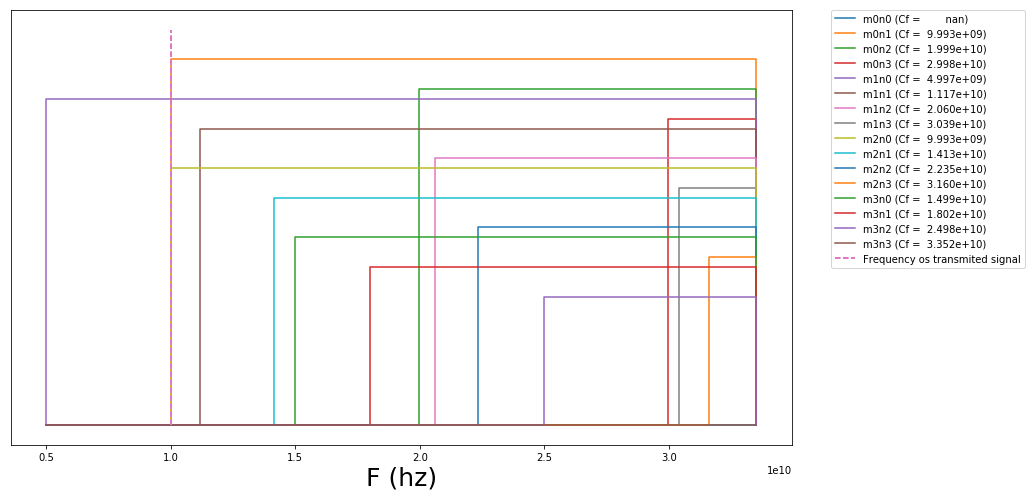

In [7]:
import matplotlib.pyplot as plt
import numpy as np 

guide1=RectangularWaveGuide(a=0.03, f=10*math.pow(10,9))

len_m = 4
len_n = 4

m,n = np.meshgrid(np.arange(len_m), np.arange(len_n))
cf = np.empty((len_m, len_n))

possible_modes = []
for i in range(len_m):
    for j in range(len_n):
        cf[i][j] = guide1.calcCF(m[j][i], n[j][i])
        if cf[i][j] < guide1.f:
            possible_modes += [[cf[i][j], "m"+str(i) + "n" + str(j)]]

print("Number of possible modes: ", len(possible_modes))
print("Modes:")
for mode in possible_modes:
    print("mode:", mode[1], "  cutoff frequency: %10.3e"%mode[0])

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)


def step(f_in, y_out, cut_f):
    """
    step function. Simulate A*u(t - x) where t=f_in, x=cut_f and A=y_out
    :param f_in: input frequency
    :param cut_f: cutoff frequency 
    :param y_out: Amplitude 
    """
    if f_in > cut_f: 
        return y_out 
    else:
        return 0

y_scale = 7*len_m + 3*len_n   

x2 = np.sort(np.ravel(cf))
for i, line in enumerate(cf[0:4, 0:4]): 
    for j, cut in enumerate(line): 
        y_value = y_scale - 7*i - 3*j
        y2 = [step(f, y_value, cut) for f in x2]
        step_plot =ax.step(x2, y2, label=("m" + str(i)) + "n" + str(j) + " (Cf = %10.3e" %cut + ")")
        
ax.plot([guide1.f, guide1.f], [0, y_scale], '--',linewidth=2, label="Frequency os transmited signal")
ax.tick_params(axis='both', left='off', labelleft='off')
ax.set_xlabel('F (hz)', fontsize=25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()  


<p style="text-align: justify; text-indent:4em">  <strong>2)</strong>
A WR90 rectangular waveguide has dimensions a = 25.4 mm and b = 12.7
mm (Fig. 1). Determine the cutoff frequencies of the three lowest order modes.
</p>

In [43]:
import numpy as np 

guide2=RectangularWaveGuide(a=0.0254, b=0.0127, f=10*math.pow(10,9))

len_m = 4
len_n = 4

dtype = [('m', int), ('n', int), ('cf', float)]
cf_x_mn = np.zeros(len_m*len_n, dtype=dtype)
count = 0
for i in range(len_m):
    for j in range(len_n):
        cf_x_mn[count] = i, j, guide2.calcCF(i, j)
        count +=1
        
three_lowest = np.sort(cf_x_mn, order='cf')[0:3]   
print("Three lowest modes: ")
for mode in three_lowest:
    print("mode: m%dn" %mode[0]+str(mode[1]), "  cutoff frequency: %10.3e"%mode[2])


For TE modes, m or n can be zero, but not both. You tried: m=0 n=0 

Three lowest modes: 
mode: m1n0   cutoff frequency:  5.901e+09
mode: m0n1   cutoff frequency:  1.180e+10
mode: m2n0   cutoff frequency:  1.180e+10


<p style="text-align: justify; text-indent:4em">  <strong>3)</strong>
A 6 GHz signal propagates on a rectangular guide through the
dominant mode. Assuming that the phase velocity is equal to 1.1 times the speed of light,
determine the dimensions of the guide. Also determine the wave impedance of the dominant mode.
</p>

In [52]:
import numpy as np 

c = 299792458.011

guide3=RectangularWaveGuide(f=6*math.pow(10,9))

cf = guide3.calcCF_th_ps(ps=1.1*c)

a = guide3.calcA(cf=cf)

print("For a standard guide:")
print("a=%fm and "%a, " b=%fm" %(a/2))

For a standard guide:
a=0.084808m and   b=0.042404m


<p style="text-align: justify; text-indent:4em">  <strong>4)</strong>
For a rectangular waveguide with TM mode, a = 22,8 mm and b = 10,01mm plot the cutoff frequencies for different values of m and n.
</p>

For TM modes, m=0 or n=0 are not possible. You tried: m=0 n=0 

For TM modes, m=0 or n=0 are not possible. You tried: m=0 n=1 

For TM modes, m=0 or n=0 are not possible. You tried: m=0 n=2 

For TM modes, m=0 or n=0 are not possible. You tried: m=0 n=3 

For TM modes, m=0 or n=0 are not possible. You tried: m=1 n=0 

For TM modes, m=0 or n=0 are not possible. You tried: m=2 n=0 

For TM modes, m=0 or n=0 are not possible. You tried: m=3 n=0 



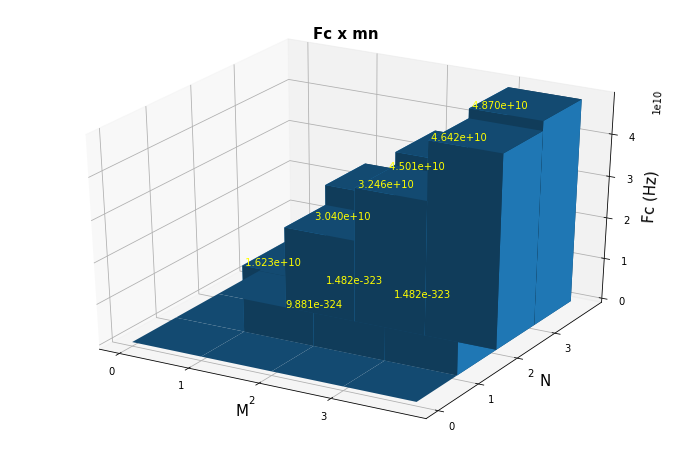

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np 
from IPython.core.display import HTML
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


len_m = 4
len_n = 4

m,n = np.meshgrid(np.arange(len_m), np.arange(len_n))
cf = np.empty((len_m, len_n))

guide = RectangularWaveGuide(mode="tm", a=0.0228, b=0.0101)

def number_compress(number: float):
    """
    Return a number in cientific notation
    :param number: number to be formatted
    """
    return "%10.3e"%number

for i in range(len_m):
    for j in range(len_n):
        cf[i][j] = guide.calcCF(m[j][i], n[j][i])
        if not np.isnan(cf[i][j]):
            ax.text(m[j][i], n[j][i], cf[j][i], number_compress(cf[j][i]), color='yellow')

# Plot CF's x mn in 3d chart 
plt.xticks(range(len_m))
plt.yticks(range(len_n))
plt.title("Fc x mn", fontweight="bold", fontsize="15")
ax.set_xlabel('M', fontsize=15)
ax.set_ylabel('N', fontsize=15)
ax.set_zlabel('Fc (Hz)', fontsize=15)

x, y, z = m.ravel(), n.ravel(), cf.ravel()

bottom = np.zeros_like(z)
width = depth = 1

ax.bar3d(x, y, bottom, width, depth, z, alpha=1)
plt.show()    


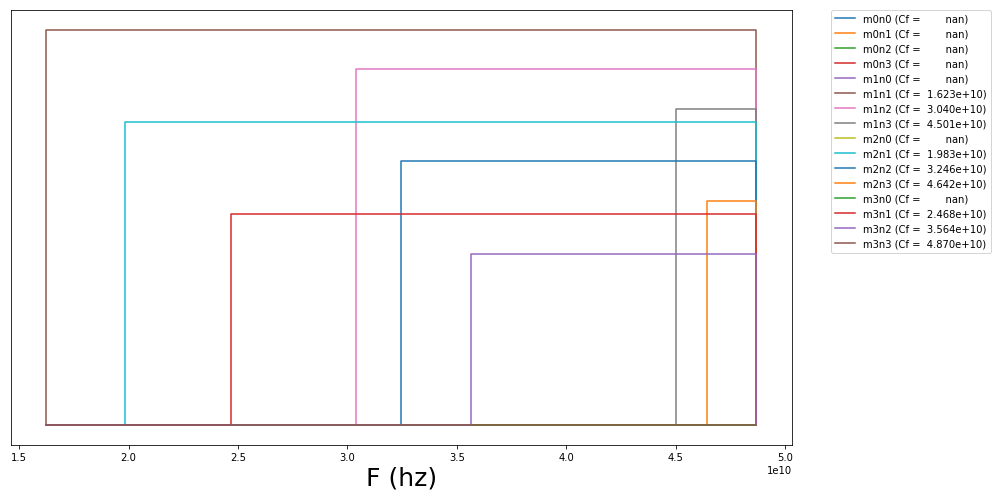

In [12]:
# Step chart 

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)


def step(f_in, y_out, cut_f):
    """
    step function. Simulate A*u(t - x) where t=f_in, x=cut_f and A=y_out
    :param f_in: input frequency
    :param cut_f: cutoff frequency 
    :param y_out: Amplitude 
    """
    if f_in > cut_f: 
        return y_out 
    else:
        return 0

y_scale = 7*len_m + 3*len_n   

x2 = np.sort(np.ravel(cf))
for i, line in enumerate(cf[0:4, 0:4]): 
    for j, cut in enumerate(line): 
        
        y_value = y_scale - 7*i - 3*j
        y2 = [step(f, y_value, cut) for f in x2]
        step_plot =ax.step(x2, y2, label=("m" + str(i)) + "n" + str(j) + " (Cf = %10.3e" %cut + ")")

ax.tick_params(axis='both', left='off', labelleft='off')
ax.set_xlabel('F (hz)', fontsize=25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [16]:
# Preparing html table
html = """
     <table style="border:none">
         <tr style="border:none; background-color:#f7f7f7;">
             <td style="padding:20px; border:none; font-weight:bold;">
              m \ n """+ """
             </td>
    """

for j in range(len_n):
    html += """<td style="padding:20px; border:none; font-weight:bold; text-align:center;">
              <b> %d </b>""" %j+ """
             </td>"""
html += """ </tr> """

for i in range(len_m):
    html += """<tr style="border:none">
               <td style="padding:20px; border:none; font-weight:bold;
               background-color:#f7f7f7; text-align:center;">%d</td>""" %i
    for j in range(len_n): 
        html += """<td style="padding:20px; border:none;">%10.3e Hz</td> """ %cf[i][j] 
    
    html += """</tr>"""

html += """</table>"""
HTML(html)

m \ n,0,1,2,3
0,nan Hz,nan Hz,nan Hz,nan Hz
1,nan Hz,1.623e+10 Hz,3.040e+10 Hz,4.501e+10 Hz
2,nan Hz,1.983e+10 Hz,3.246e+10 Hz,4.642e+10 Hz
3,nan Hz,2.468e+10 Hz,3.564e+10 Hz,4.870e+10 Hz


<h2>References</h2>
<p>CARVALHO, Maria Inês Barbosa de. GUIAS DE ONDA: Electrotecnia Teórica. Porto: Faculdade de Engenharia Universidade do Porto, 2005. 91 p. Disponível em: <https://paginas.fe.up.pt/~mines/OE/Guias.pdf>. Acesso em: 22 nov. 2017.
</p>

<p>BLATTENBERGER, Kirt (Ed.). Rectangular & Circular Waveguide: Equations, Fields, & fco Calculator. Disponível em: <http://www.rfcafe.com/references/electrical/waveguide.htm>. Acesso em: 21 nov. 2017.
</p>